# Working with latitudes and longitudes

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
stations = pd.read_csv("data/stations_clean.csv")
stations.head()

,latitude,longitude,name,station_id
0,30.27041,-97.75046,West & 6th St.,2537
1,30.26452,-97.77120,Barton Springs Pool,2572
2,30.27595,-97.74739,ACC - Rio Grande & 12th,2545
3,30.28480,-97.72756,Red River & LBJ Library,1004
4,30.26694,-97.74939,Nueces @ 3rd,1008


In [3]:
station2537 = stations.iloc[0]
station2572 = stations.iloc[1]

## Manhattan distance

In [6]:
def manhattan_distance(lat1, lng1, lat2, lng2):
    a = np.abs(lat2 -lat1)
    b = np.abs(lng1 - lng2)
    return a + b

In [7]:
stations

,latitude,longitude,name,station_id
0,30.27041,-97.75046,West & 6th St.,2537
1,30.26452,-97.77120,Barton Springs Pool,2572
2,30.27595,-97.74739,ACC - Rio Grande & 12th,2545
3,30.28480,-97.72756,Red River & LBJ Library,1004
4,30.26694,-97.74939,Nueces @ 3rd,1008
...,...,...,...,...
67,30.26634,-97.74378,4th & Congress,2495
68,30.26780,-97.75189,3rd & West,2552
69,30.26960,-97.75332,5th & Bowie,2501
70,30.26416,-97.73289,5th & San Marcos,2564


In [8]:
manhattan_distance(station2537['latitude'], station2537['longitude'], station2572['latitude'], station2572['longitude'])

0.02662999999998661

In [11]:
# datasist MODULE
from datasist.feature_engineering import manhattan_distance

manhattan_distance(station2537['latitude'], station2537['longitude'], station2572['latitude'], station2572['longitude'])

0    0.02663
dtype: float64

## Haversine distance

In [12]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

In [13]:
haversine_array(station2537['latitude'], station2537['longitude'], station2572['latitude'], station2572['longitude'])

2.0967222884044348

In [14]:
# datasist MODULE
from datasist.feature_engineering import haversine_distance

haversine_distance(station2537['latitude'], station2537['longitude'], station2572['latitude'], station2572['longitude'])

0    2.096722
dtype: float64

## Bearing

In [15]:
def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [16]:
bearing_array(station2537['latitude'], station2537['longitude'], station2572['latitude'], station2572['longitude'])

-108.19645663227993

In [17]:
# datasist MODULE
from datasist.feature_engineering import bearing

bearing(station2537['latitude'], station2537['longitude'], station2572['latitude'], station2572['longitude'])

0   -108.196457
dtype: float64

## Example: Bike Sharing Demand dataset

Cilj: Predict daily ridership totals.

In [18]:
# read the trips dataset
trips = pd.read_csv("data/bike_trips_clean.csv")
trips.dropna(inplace=True)
trips.head()

,duration_minutes,end_station_id,start_station_id,start_time,trip_id
0,41,2565.0,2536.0,2015-03-19 19:12:00,9900082882
1,6,2570.0,2494.0,2016-10-30 02:06:04,12617682
2,13,2498.0,2538.0,2016-03-11 16:28:27,9075366
3,80,2712.0,2497.0,2014-11-23 15:12:00,9900319298
4,25,3377.0,2707.0,2017-04-16 15:39:13,14468597


In [19]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615100 entries, 0 to 649230
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_minutes  615100 non-null  int64  
 1   end_station_id    615100 non-null  float64
 2   start_station_id  615100 non-null  float64
 3   start_time        615100 non-null  object 
 4   trip_id           615100 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 28.2+ MB


In [20]:
trips["start_time"] = pd.to_datetime(trips["start_time"])
trips["trip_id"] = trips["trip_id"].astype("int")
trips["end_station_id"] = trips["end_station_id"].astype("int")
trips["start_station_id"] = trips["start_station_id"].astype("int")

In [21]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615100 entries, 0 to 649230
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   duration_minutes  615100 non-null  int64         
 1   end_station_id    615100 non-null  int64         
 2   start_station_id  615100 non-null  int64         
 3   start_time        615100 non-null  datetime64[ns]
 4   trip_id           615100 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 28.2 MB


In [22]:
trips.isnull().sum()

duration_minutes    0
end_station_id      0
start_station_id    0
start_time          0
trip_id             0
dtype: int64

In [23]:
def get_time_features(trips):
    """Takes a date and returns day of week, month, hour and 
    whether it is a weekday/workhour"""
    ser = trips["start_time"]
    trips["date"] = ser.dt.date
    trips["time"] = ser.dt.time
    trips["year"] = ser.dt.year
    trips["month"] = ser.dt.month
    trips["day"] = ser.dt.day
    trips["dow"] = ser.dt.dayofweek
    trips["dow_name"] = ser.dt.day_name()
    trips["hour"] = ser.dt.hour
    trips["weekday"] = trips["dow"].apply(lambda x: 1 if x < 5 else 0)
    trips["workhour"] = trips["hour"].apply(lambda x: 1 if x in [8,17] else 0)
    return trips

In [24]:
trips_full = get_time_features(trips)
trips_full.drop(columns= ["start_time"], inplace=True)

In [25]:
trips_full.head()

,duration_minutes,end_station_id,start_station_id,trip_id,date,time,year,month,day,dow,dow_name,hour,weekday,workhour
0,41,2565,2536,9900082882,2015-03-19,19:12:00,2015,3,19,3,Thursday,19,1,0
1,6,2570,2494,12617682,2016-10-30,02:06:04,2016,10,30,6,Sunday,2,0,0
2,13,2498,2538,9075366,2016-03-11,16:28:27,2016,3,11,4,Friday,16,1,0
3,80,2712,2497,9900319298,2014-11-23,15:12:00,2014,11,23,6,Sunday,15,0,0
4,25,3377,2707,14468597,2017-04-16,15:39:13,2017,4,16,6,Sunday,15,0,0


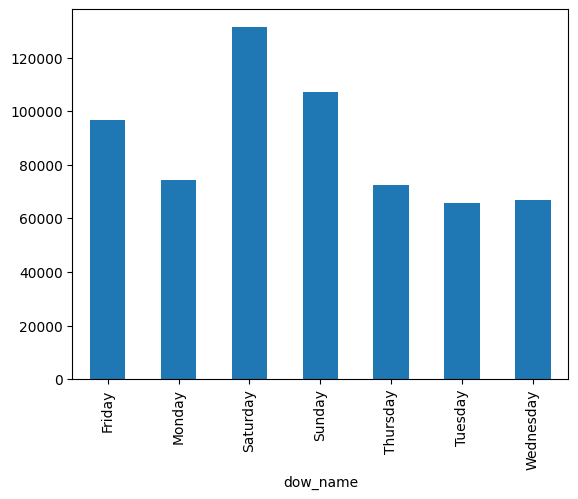

In [26]:
trips_full.groupby('dow_name').dow_name.count().plot(kind="bar")
plt.show()

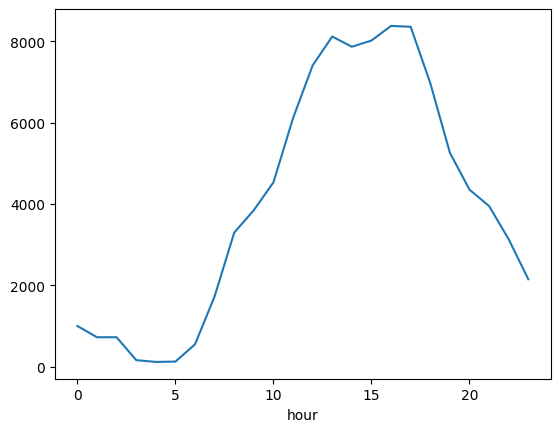

In [27]:
trips_full.groupby(["dow_name", "hour"]).dow_name.count()["Friday"].plot()
plt.show()

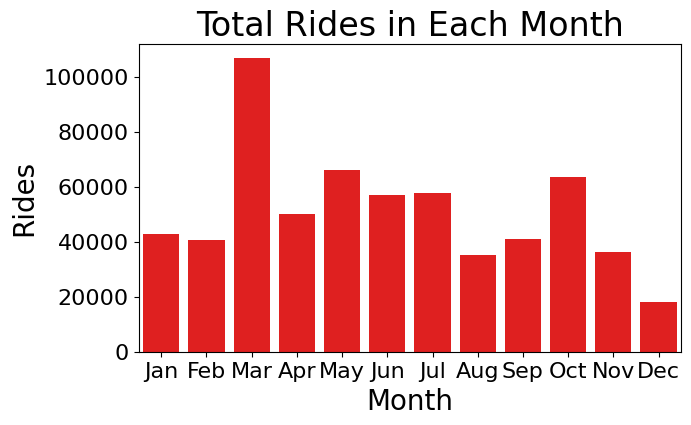

In [28]:
tripsByMonth = trips_full.groupby('month').month.count()
tripsByMonth.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ax = sns.barplot(x='index', y='month', data=tripsByMonth.reset_index(), color='red')
ax.figure.set_size_inches(7,4)
sns.set_style(style='white')
ax.axes.set_title('Total Rides in Each Month', fontsize=24)
ax.set_xlabel('Month', size=20)
ax.set_ylabel('Rides', size=20)
ax.tick_params(labelsize=16)
plt.show()

In [29]:
trips_by_year_month = trips_full
trips_by_year_month = trips_by_year_month.groupby(['month','year']).month.count()
trips_by_year_month

month  year
1      2014     3359
       2015     6957
       2016    22152
       2017    10446
2      2014     5297
       2015     8447
       2016    13355
       2017    13584
3      2014    23626
       2015    26975
       2016    29566
       2017    26532
4      2014    12722
       2015    15138
       2017    22404
5      2014    12953
       2015    14450
       2016    19560
       2017    19123
6      2014    11754
       2015    12677
       2016    16540
       2017    16108
7      2014    11984
       2015    14850
       2016    16255
       2017    14618
8      2014     9415
       2015    13262
       2016    12385
9      2014    10012
       2015    14994
       2016    15919
10     2014    16504
       2015    22823
       2016    24266
11     2014     9807
       2015    11716
       2016    14653
12     2013     1457
       2014     6426
       2015    10029
Name: month, dtype: int64

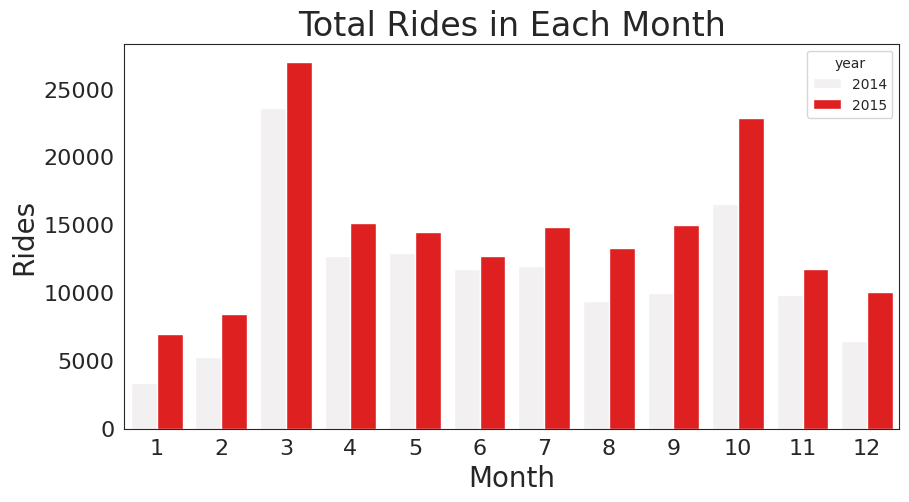

In [32]:
tripsFullYears = trips_full[trips_full['year'].isin([2014,2015])]
tripsFullYears = tripsFullYears.groupby(['month', 'year'])["trip_id"].count()
tripsByMonth = pd.DataFrame(tripsFullYears)
ax = sns.barplot(x='month', y="trip_id", hue='year', data=tripsByMonth.reset_index(), color='red')
ax.figure.set_size_inches(10,5)
sns.set_style(style='white')
ax.axes.set_title('Total Rides in Each Month', fontsize=24)
ax.set_xlabel('Month', size=20)
ax.set_ylabel('Rides', size=20)
ax.tick_params(labelsize=16)
plt.show()

In [33]:
weather = pd.read_csv("data/austin_weather.csv", na_values="-")
weather.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,...,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,...,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,0,
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,...,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,0,
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,...,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,0,
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,...,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,T,


In [34]:
weather["Events"].unique()

array(['Rain , Thunderstorm', ' ', 'Rain', 'Fog', 'Rain , Snow',
       'Fog , Rain', 'Thunderstorm', 'Fog , Rain , Thunderstorm',
       'Fog , Thunderstorm'], dtype=object)

In [51]:
weather = pd.read_csv("data/austin_weather.csv", na_values="-")

weather_new = pd.DataFrame()
weather_new["date"] = pd.to_datetime(weather["Date"])
weather_new['rain'] = np.where(weather['Events'].str.contains('Rain'), 1, 0)
weather_new['thunderstorm'] = np.where(weather['Events'].str.contains('Thunderstorm'), 1, 0)
weather_new['fog'] = np.where(weather['Events'].str.contains('Fog'), 1, 0)
weather_new['snow'] = np.where(weather['Events'].str.contains('Snow'), 1, 0)
weather_new['temp_avg'] = weather['TempAvgF'].astype("int")
weather_new['humidity_avg'] = weather['HumidityAvgPercent'].astype("float")
weather_new['wind_avg'] = weather['WindAvgMPH'].astype("float")
weather_new['wind_gust'] = weather['WindGustMPH'].astype("float")
# Convert traces of rain to .001 inches of rain to recognize that there was perciptation 
# but it was a value less than what could be measured.
weather_new['precipitation_inches'] = np.where(weather['PrecipitationSumInches'] == 'T', 0.001, weather['PrecipitationSumInches'])
weather_new['precipitation_inches'] = weather_new['precipitation_inches'].astype("float")
# select the range
weather_new = weather_new[(weather_new['date'] >= '2014-01-01') & (weather_new['date'] <= '2015-12-31')]
weather_new = weather_new.set_index('date', drop=True)
weather_new = weather_new.fillna(weather_new.mean(numeric_only=True))

In [55]:
weather_new.shape

(730, 9)

In [56]:
weather_new.head(10)

,rain,thunderstorm,fog,snow,temp_avg,humidity_avg,wind_avg,wind_gust,precipitation_inches
date,,,,,,,,,
2014-01-01,0,0,0,0,54,68.0,4.0,22.0,0.00
2014-01-02,0,0,0,0,44,55.0,8.0,31.0,0.00
2014-01-03,0,0,0,0,43,49.0,4.0,21.0,0.00
2014-01-04,0,0,0,0,57,68.0,7.0,28.0,0.00
2014-01-05,0,0,0,0,47,59.0,10.0,34.0,0.00
2014-01-06,0,0,0,0,29,38.0,7.0,27.0,0.00
2014-01-07,0,0,0,0,35,43.0,5.0,22.0,0.00
2014-01-08,1,0,0,0,47,75.0,1.0,18.0,0.16
2014-01-09,0,0,1,0,62,80.0,3.0,19.0,0.00


In [53]:
weather_new.isnull().sum()

rain                    0
thunderstorm            0
fog                     0
snow                    0
temp_avg                0
humidity_avg            0
wind_avg                0
wind_gust               0
precipitation_inches    0
dtype: int64

In [54]:
trips_full.head()

,duration_minutes,end_station_id,start_station_id,trip_id,date,time,year,month,day,dow,dow_name,hour,weekday,workhour
0,41,2565,2536,9900082882,2015-03-19,19:12:00,2015,3,19,3,Thursday,19,1,0
1,6,2570,2494,12617682,2016-10-30,02:06:04,2016,10,30,6,Sunday,2,0,0
2,13,2498,2538,9075366,2016-03-11,16:28:27,2016,3,11,4,Friday,16,1,0
3,80,2712,2497,9900319298,2014-11-23,15:12:00,2014,11,23,6,Sunday,15,0,0
4,25,3377,2707,14468597,2017-04-16,15:39:13,2017,4,16,6,Sunday,15,0,0


In [57]:
trips = trips_full[trips_full['year'].isin([2014,2015])]
trips = trips.groupby(['date'])["trip_id"].count().to_frame()
trips.columns = ['trip_count']
trips.head()

,trip_count
date,
2014-01-01,267
2014-01-02,143
2014-01-03,63
2014-01-04,173
2014-01-05,44


In [58]:
def get_time_features(trips):
    """Takes a date and returns day of week, month, hour and 
    whether it is a weekday/workhour"""
    ser = pd.to_datetime(trips.index)
    trips["year"] = ser.year
    trips["month"] = ser.month
    trips["day"] = ser.day
    trips["dow"] = ser.dayofweek
    trips["weekday"] = trips["dow"].apply(lambda x: 1 if x < 5 else 0)
    return trips

In [59]:
trips = get_time_features(trips).copy()

In [60]:
trips.head()

,trip_count,year,month,day,dow,weekday
date,,,,,,
2014-01-01,267,2014,1,1,2,1
2014-01-02,143,2014,1,2,3,1
2014-01-03,63,2014,1,3,4,1
2014-01-04,173,2014,1,4,5,0
2014-01-05,44,2014,1,5,6,0


In [61]:
# Inner join ridership and weather data together
trips_with_weather = pd.merge(right=trips, left=weather_new, how='inner', left_index=True, right_index=True)

In [62]:
trips_with_weather

,rain,thunderstorm,fog,snow,temp_avg,humidity_avg,wind_avg,wind_gust,precipitation_inches,trip_count,year,month,day,dow,weekday
date,,,,,,,,,,,,,,,
2014-01-01,0,0,0,0,54,68.0,4.0,22.0,0.000,267,2014,1,1,2,1
2014-01-02,0,0,0,0,44,55.0,8.0,31.0,0.000,143,2014,1,2,3,1
2014-01-03,0,0,0,0,43,49.0,4.0,21.0,0.000,63,2014,1,3,4,1
2014-01-04,0,0,0,0,57,68.0,7.0,28.0,0.000,173,2014,1,4,5,0
2014-01-05,0,0,0,0,47,59.0,10.0,34.0,0.000,44,2014,1,5,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,1,1,0,0,55,89.0,10.0,33.0,1.320,52,2015,12,27,6,0
2015-12-28,0,0,0,0,41,75.0,8.0,35.0,0.001,147,2015,12,28,0,1
2015-12-29,1,0,0,0,43,74.0,3.0,11.0,0.030,307,2015,12,29,1,1


In [63]:
from sklearn.metrics import mean_squared_error

def get_scores(trained_model, X_train, X_test, y_train, y_test):
    pred = trained_model.predict(X_test)
    mse = np.sqrt(mean_squared_error(y_test, pred))
    print(f'Mean error: {mse:.5} min ({mse/np.mean(pred)*100:3.3}%)')
    print(f"Training set score: {trained_model.score(X_train, y_train):.2f}")
    print(f"Test set score: {trained_model.score(X_test, y_test):.2f}")

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( 
    trips_with_weather.drop(columns=["trip_count"]), trips_with_weather["trip_count"], test_size = .3, random_state = 13, shuffle=True)

In [65]:
X_train.shape

(510, 14)

In [66]:
X_test.shape

(219, 14)

In [67]:
y_train.shape

(510,)

In [68]:
y_test.shape

(219,)

In [69]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha = 0.5)
reg.fit(X_train, y_train)

Ridge(alpha=0.5)

In [70]:
get_scores(reg, X_train, X_test, y_train, y_test)

Mean error: 385.45 min (89.7%)
Training set score: 0.26
Test set score: 0.11


In [71]:
def plot_prediction_vs_actual(trained_model, X_train, X_test, y_train, y_test):
    rideCountsPredictions = trained_model.predict(X_test)
    rideCountsActual = y_test
    ax = sns.regplot(x=rideCountsActual, y=rideCountsPredictions)
    ax.figure.set_size_inches(10,6)
    ax.axes.set_title('Predictions Vs. Actual', fontsize=24)
    ax.set_xlabel('Actual', fontsize=20)
    ax.set_ylabel('Predictions', fontsize=20)
    ax.tick_params(labelsize=16)
    plt.show()

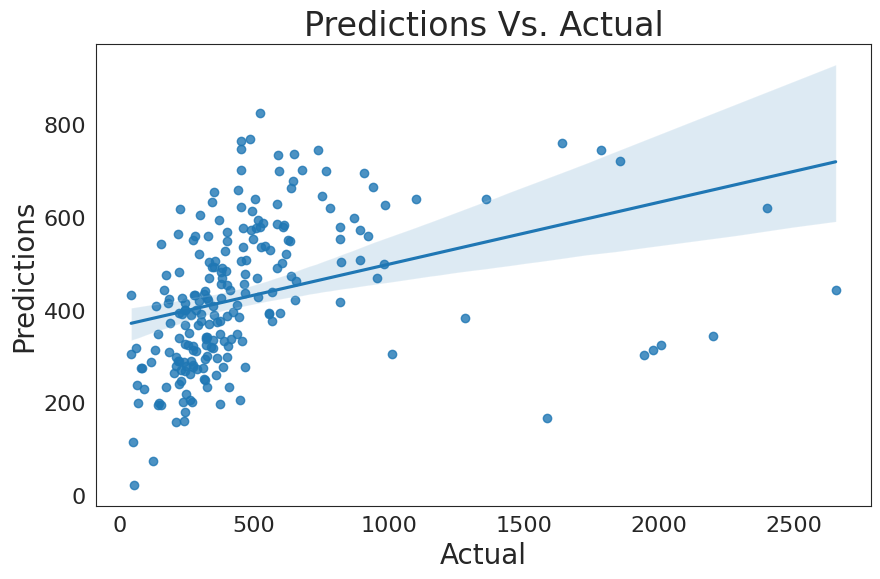

In [72]:
plot_prediction_vs_actual(reg, X_train, X_test, y_train, y_test)

Mean error: 385.46 min (89.7%)
Training set score: 0.26
Test set score: 0.11


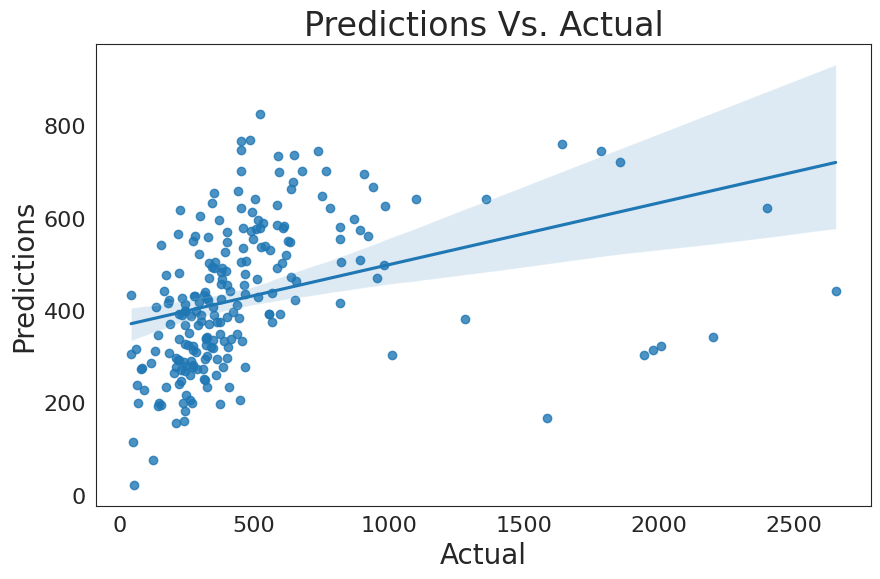

In [73]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=0.1)
reg.fit(X_train, y_train)

get_scores(reg, X_train, X_test, y_train, y_test)
plot_prediction_vs_actual(reg, X_train, X_test, y_train, y_test)

In [74]:
outlierTrips = trips_with_weather[trips_with_weather["trip_count"] > 1500]
outlierTrips

,rain,thunderstorm,fog,snow,temp_avg,humidity_avg,wind_avg,wind_gust,precipitation_inches,trip_count,year,month,day,dow,weekday
date,,,,,,,,,,,,,,,
2014-03-10,1,0,0,0,61,69.0,3.0,17.0,0.01,1586,2014,3,10,0,1
2014-03-11,0,0,0,0,70,66.0,5.0,22.0,0.00,1947,2014,3,11,1,1
2014-03-12,0,0,0,0,60,36.0,11.0,37.0,0.00,1739,2014,3,12,2,1
2014-03-13,0,0,0,0,52,35.0,4.0,18.0,0.00,2007,2014,3,13,3,1
2014-03-14,0,0,0,0,62,68.0,5.0,24.0,0.00,2612,2014,3,14,4,1
2014-03-15,1,0,1,0,68,81.0,4.0,17.0,0.07,2396,2014,3,15,5,0
2015-03-13,0,0,0,0,66,68.0,3.0,18.0,0.00,1552,2015,3,13,4,1
2015-03-14,0,0,0,0,66,61.0,6.0,23.0,0.00,2403,2015,3,14,5,0
2015-03-15,0,0,0,0,60,72.0,3.0,16.0,0.00,2340,2015,3,15,6,0


In [75]:
from datetime import datetime

def spring_break_woo(date):
    if (date >= datetime(2015, 3, 14)) & (date <= datetime(2015, 3, 23)):
        return 1
    if (date >= datetime(2014, 3, 8)) & (date <= datetime(2014, 3, 17)):
        return 1
    return 0

In [76]:
trips_with_weather['spring_break'] = trips_with_weather.apply(lambda row: spring_break_woo(row.name), axis=1)
trips_with_weather.head()

,rain,thunderstorm,fog,snow,temp_avg,humidity_avg,wind_avg,wind_gust,precipitation_inches,trip_count,year,month,day,dow,weekday,spring_break
date,,,,,,,,,,,,,,,,
2014-01-01,0,0,0,0,54,68.0,4.0,22.0,0.0,267,2014,1,1,2,1,0
2014-01-02,0,0,0,0,44,55.0,8.0,31.0,0.0,143,2014,1,2,3,1,0
2014-01-03,0,0,0,0,43,49.0,4.0,21.0,0.0,63,2014,1,3,4,1,0
2014-01-04,0,0,0,0,57,68.0,7.0,28.0,0.0,173,2014,1,4,5,0,0
2014-01-05,0,0,0,0,47,59.0,10.0,34.0,0.0,44,2014,1,5,6,0,0


In [79]:
def run_model(model, data):
    X_train, X_test, y_train, y_test = train_test_split(trips_with_weather.drop(columns=["trip_count"]), 
                                                        trips_with_weather["trip_count"], 
                                                        test_size = .3, 
                                                        random_state = 13, shuffle=True)
    
    model.fit(X_train, y_train)

    get_scores(model, X_train, X_test, y_train, y_test)
    plot_prediction_vs_actual(model, X_train, X_test, y_train, y_test)

Mean error: 247.99 min (54.9%)
Training set score: 0.55
Test set score: 0.63


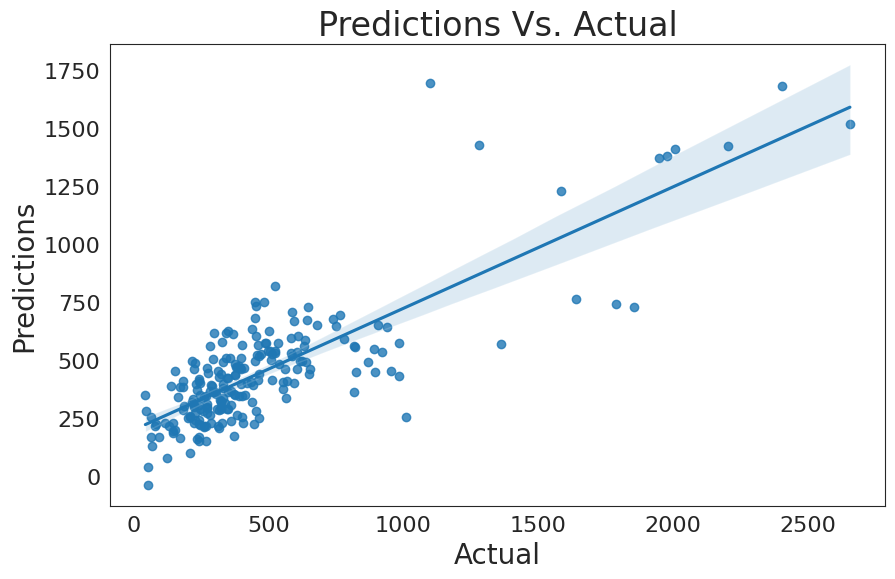

In [80]:
run_model(Lasso(alpha=0.1), trips_with_weather)

Mean error: 273.73 min (58.8%)
Training set score: 1.00
Test set score: 0.55


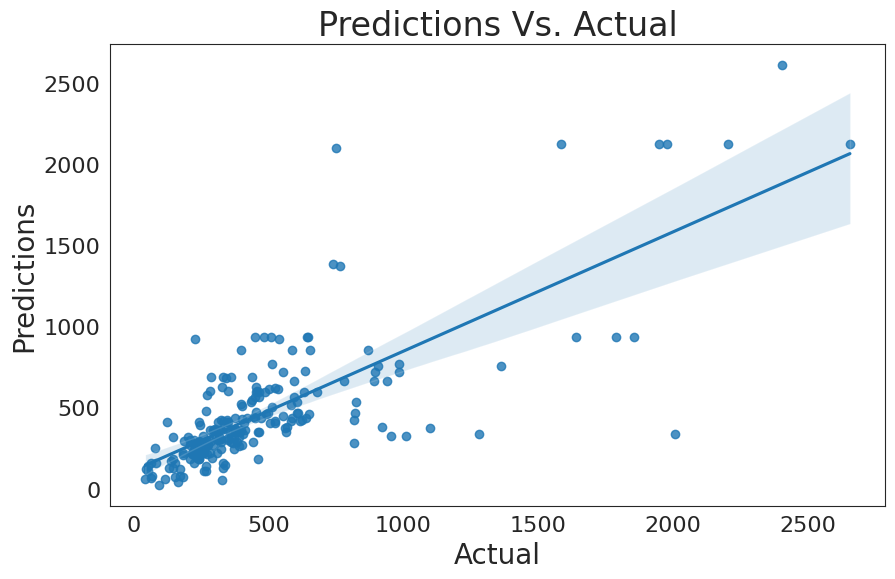

In [81]:
from sklearn.tree import DecisionTreeRegressor

run_model(DecisionTreeRegressor(max_depth=15), trips_with_weather)

In [82]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Coulumns: Index(['rain', 'thunderstorm', 'fog', 'snow', 'temp_avg', 'humidity_avg',
       'wind_avg', 'wind_gust', 'precipitation_inches', 'trip_count', 'year',
       'month', 'dow', 'weekday', 'spring_break'],
      dtype='object')
Mean error: 216.89 min (46.9%)
Training set score: 0.65
Test set score: 0.72


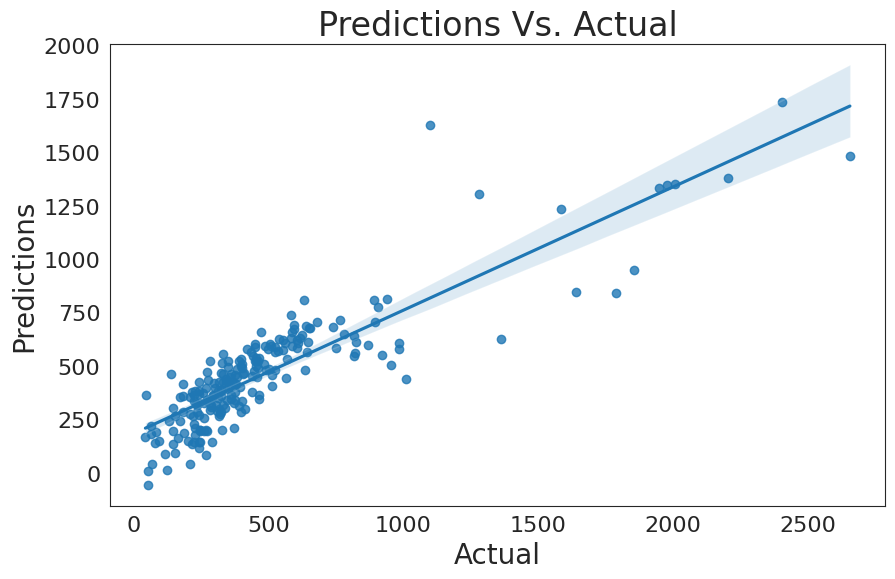

In [84]:
def run_model(model, data):
    
    data.drop(columns=["day"], inplace=True)
    
    print(f"Coulumns: {data.columns}")
    
    X_train, X_test, y_train, y_test = train_test_split(trips_with_weather.drop(columns=["trip_count"]), 
                                                        trips_with_weather["trip_count"], 
                                                        test_size = .3, 
                                                        random_state = 13, shuffle=True)
    
    
    
    vars_categorical = ["year", "month", "dow", "weekday"]
    
    # then we instantiate the imputer within a pipeline
    one_hot_encoder = Pipeline(steps=[
        ('one_hot_encoder', OneHotEncoder(categories='auto', drop='first', sparse=False)),
    ])

    # then we put the features list and the imputer in the column transformer
    preprocessor = ColumnTransformer(transformers=[
        ('cat_encoder', one_hot_encoder, vars_categorical)
        ], remainder='passthrough')

    # now we fit the preprocessor
    preprocessor.fit(X_train)
    X_train = preprocessor.transform(X_train)
    X_test = preprocessor.transform(X_test)
        
    model.fit(X_train, y_train)

    get_scores(model, X_train, X_test, y_train, y_test)
    plot_prediction_vs_actual(model, X_train, X_test, y_train, y_test)
    
run_model(Lasso(alpha=0.1), trips_with_weather)

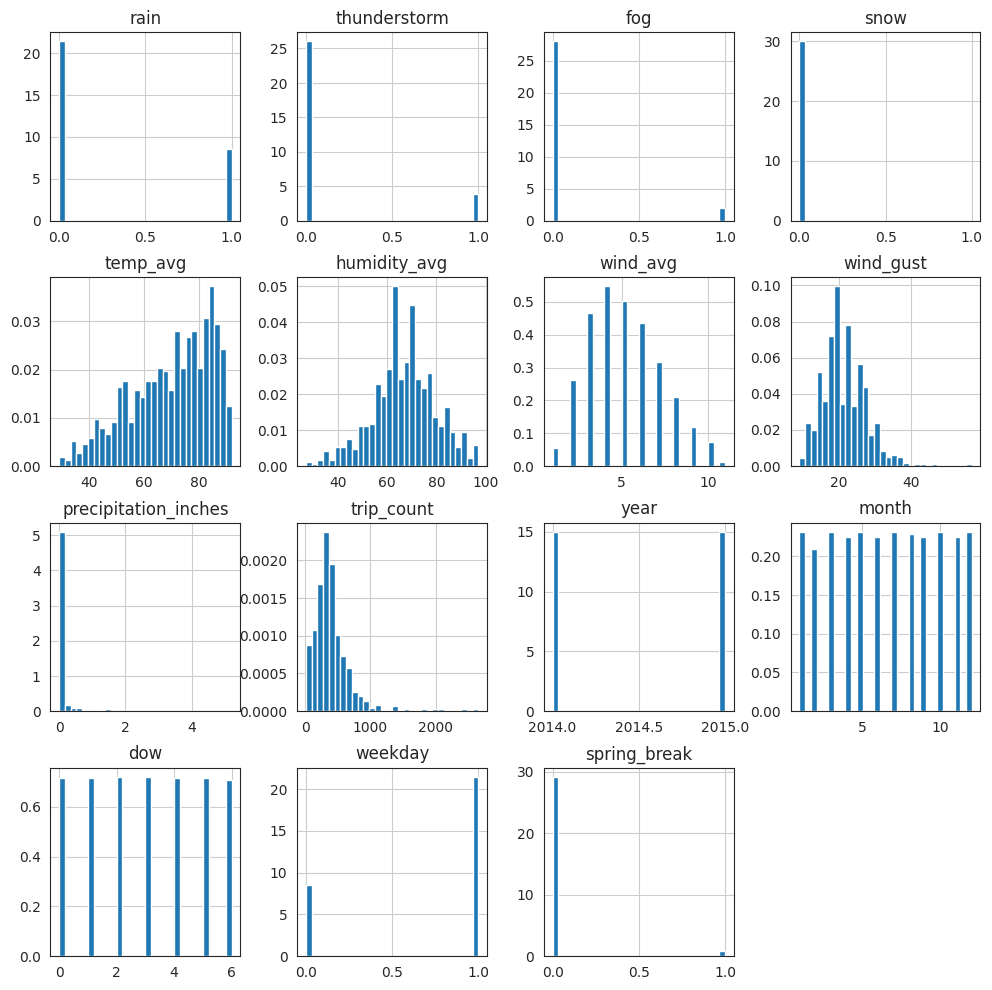

In [85]:
trips_with_weather.hist(bins=30, figsize=(12,12), density=True)
plt.show()